# Covid19 Diagnosis

### Analyse de forme

- **variable target:** SARS-Cov-2 exam result
- **lignes et colonnes:** 5644, 111
- **types de variables:** quantitatives: 74, qualitatives: 37
- **analyse des valeurs manquantes:**
    - un groupe de données (75 et 88% de données manquantes) -> variable virale
    - un groupe de données (88 à 90% de données manquantes) -> variable sanguine
    

### Analyse de fond

- **visualisation de la target:**
    - environ 10% de cas positif
    
- **signification des variables:** 
    - certaines variables continus sont standardisées tandis que d'autres sont asymétriques
    - age quantile difficile à interpréter
    - variables qualitatives sont toutes binaires
    
- **relation variables/target:**
    - target / blood: les taux de Platelets, Leukocytes, Monocytes semblent etre liés au covid (hypothèse à tester)
    - target / age: les jeunes sont ils moins touchés par le covid?
    - target / viral: les doubles maladies sont très rare
    
- **relation variables / variables:**
    - blood/blood: certaines variables sont très correlées
    - blood/age: très faible correlation entre age et taux sanguin
    - viral/viral: Influenza rapid test est très peu fiable(info internet) et donne de mauvais résultat
    - maladie(hors covid)/blood: les taux de Lymphocytes semblent etre liés à la maladie -> les taux sanguins entre malades et covid sont différents?
    - hospitalisation/malade:
    - hospitalisation/blood: interessant dans le cas ou on voudrait prédire le service d'hospitalisation d'un patient
    

### Hypothèse nulle H0

- les individus atteints du covid ont des taux de Platelets, Leukocytes, Monocytes significativement différents
    - **H0:** les taux moyens  des personnes positives et négatives sont égaux
    
- les individus atteints d'une quelconque maladie ont des taux significativement différents


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [3]:
pd.set_option('display.max_columns', 111)
pd.set_option('display.max_row', 111)

In [4]:
data = pd.read_excel('covid_dataset.xlsx')

In [5]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df = data.copy()
df.shape

(5644, 111)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


<AxesSubplot:>

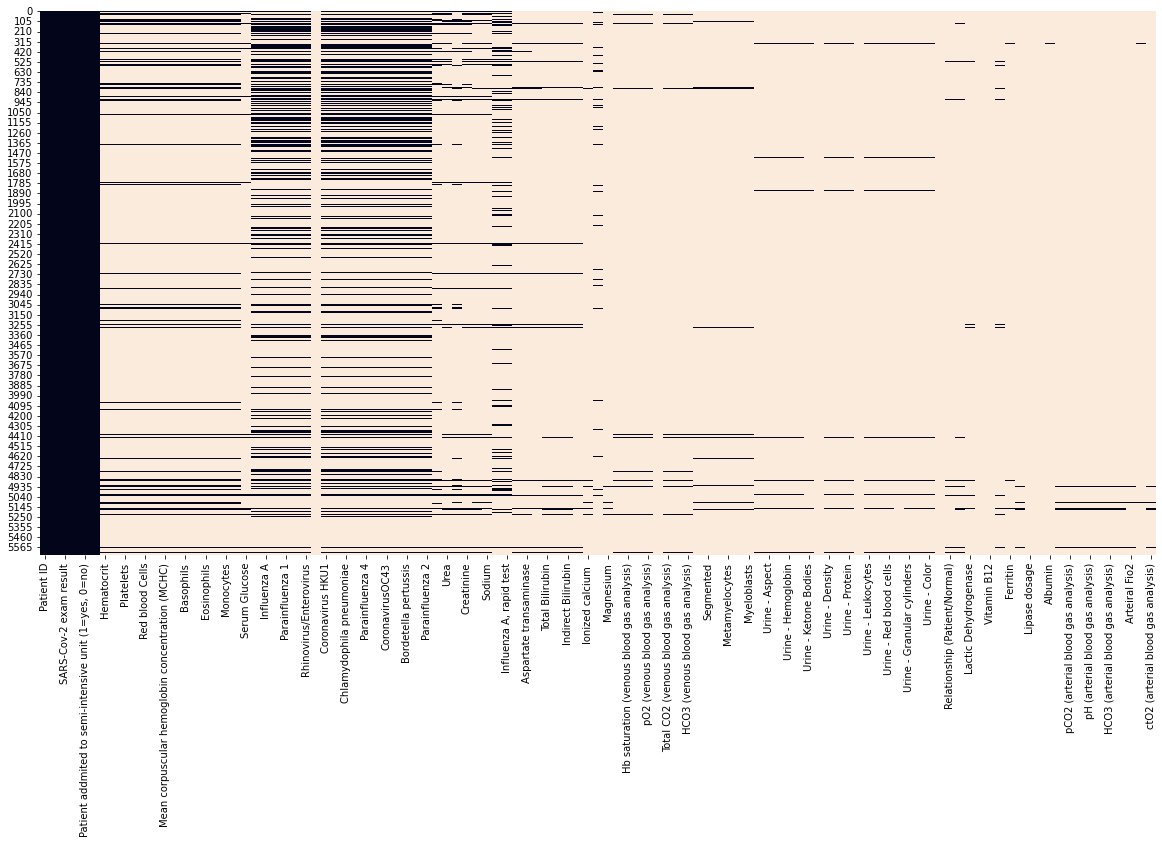

In [9]:
# analyse des Nan
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False) # les Nan en blanc

In [11]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## Elimination des colonnes inutiles

In [13]:
# on ne garde que les colonnes ayant moin de 90% de données manquantes
useful_columns = df.columns[df.isna().sum()/df.shape[0] < 0.9]
df = df[useful_columns]

df = df.drop('Patient ID', axis=1)

<AxesSubplot:>

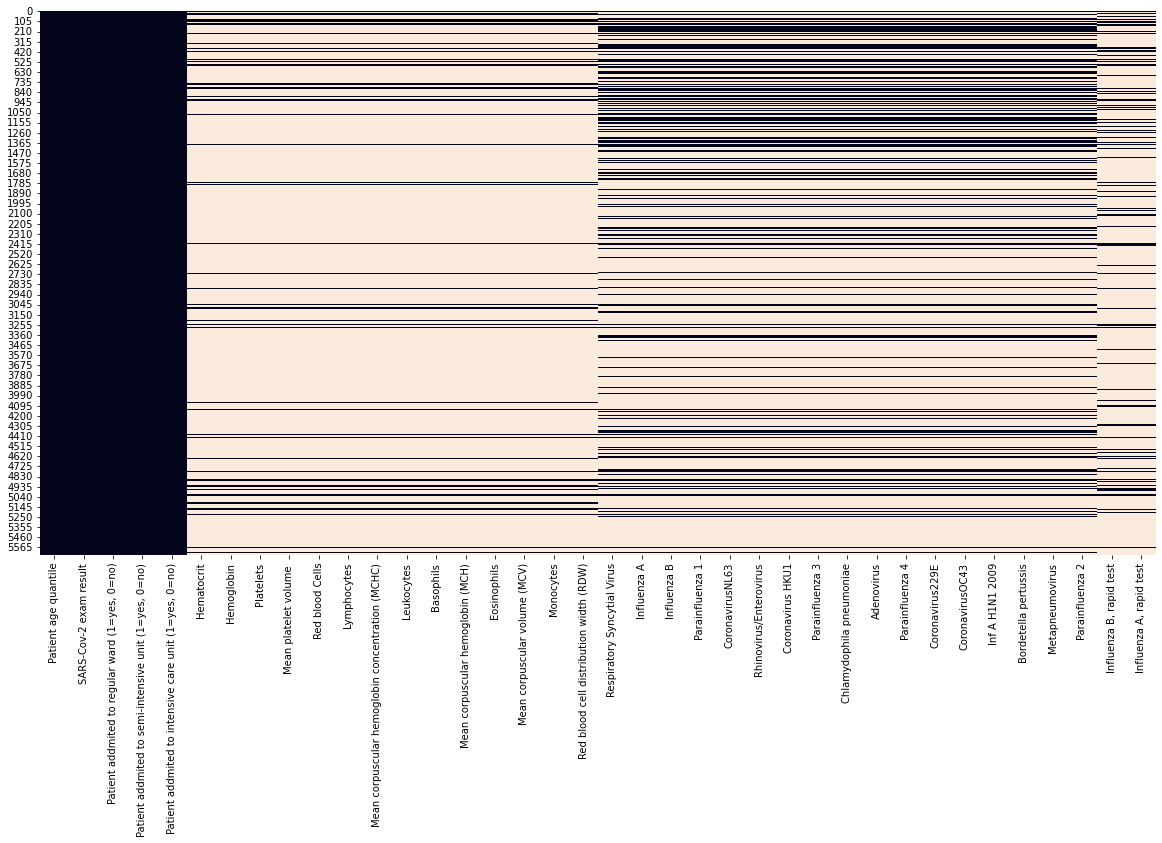

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## Analyse de la target

In [14]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

## Histogramme des variables continus

C:\Users\user\AppData\Local\Temp\ipykernel_8160\790631653.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

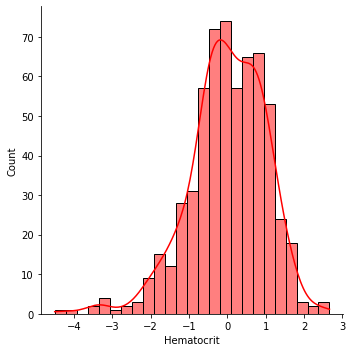

<Figure size 432x288 with 0 Axes>

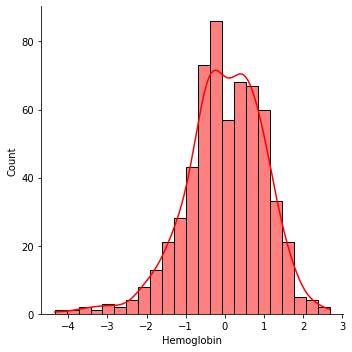

<Figure size 432x288 with 0 Axes>

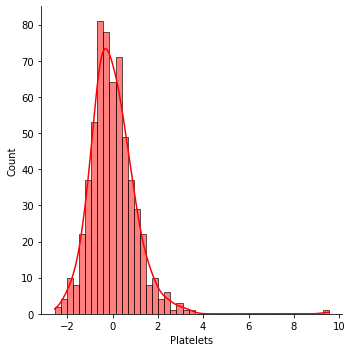

<Figure size 432x288 with 0 Axes>

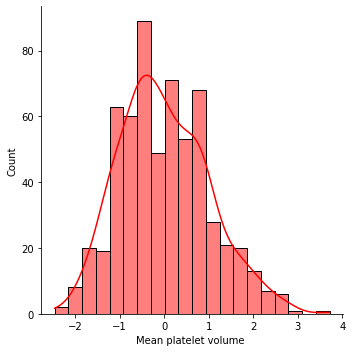

<Figure size 432x288 with 0 Axes>

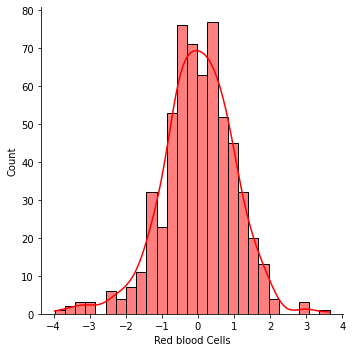

<Figure size 432x288 with 0 Axes>

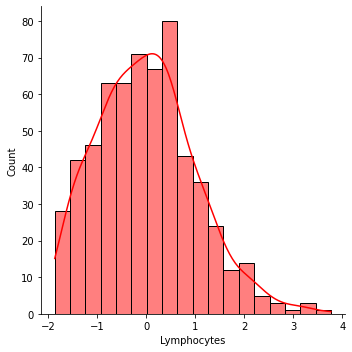

<Figure size 432x288 with 0 Axes>

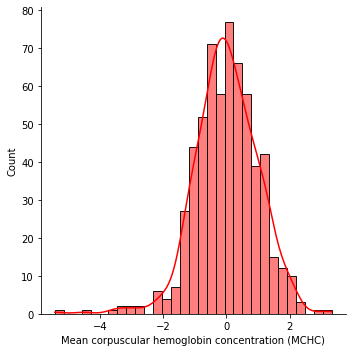

<Figure size 432x288 with 0 Axes>

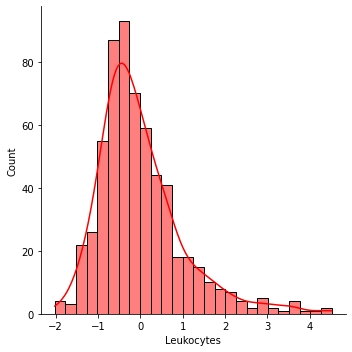

<Figure size 432x288 with 0 Axes>

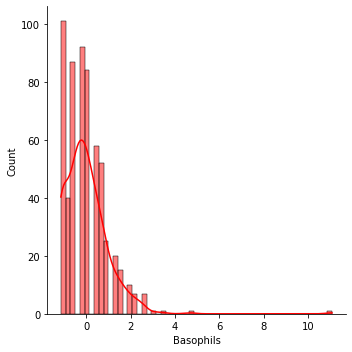

<Figure size 432x288 with 0 Axes>

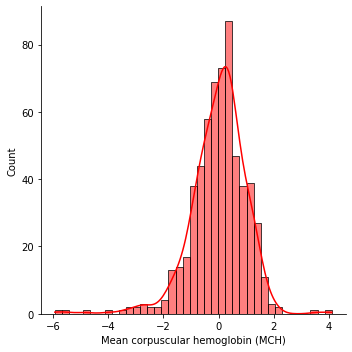

<Figure size 432x288 with 0 Axes>

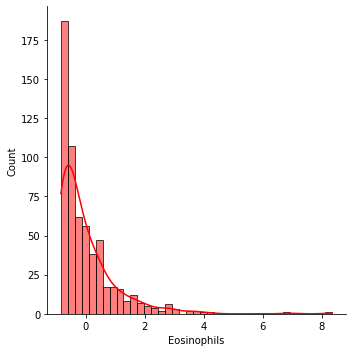

<Figure size 432x288 with 0 Axes>

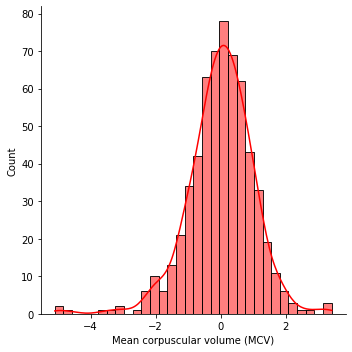

<Figure size 432x288 with 0 Axes>

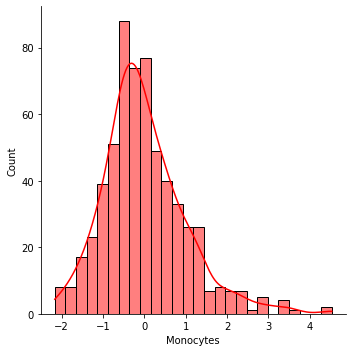

<Figure size 432x288 with 0 Axes>

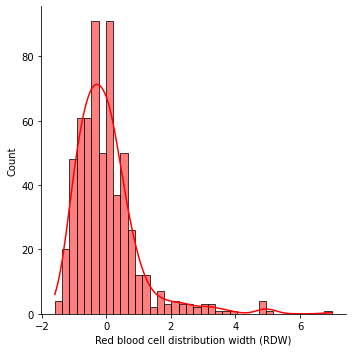

In [15]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col], kde=True, color='r')

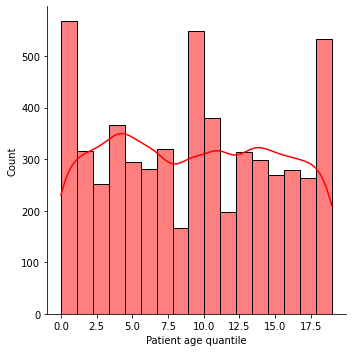

In [16]:
sns.displot(df['Patient age quantile'], kde=True, color='r')

## Analyse des variables qualitatives

In [18]:
for col in df.select_dtypes('object'):
    print(f'{col :-<60} {df[col].unique()}')

SARS-Cov-2 exam result-------------------------------------- ['negative' 'positive']
Respiratory Syncytial Virus--------------------------------- [nan 'not_detected' 'detected']
Influenza A------------------------------------------------- [nan 'not_detected' 'detected']
Influenza B------------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1--------------------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63--------------------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus-------------------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1-------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3--------------------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------------------------------------ [nan 'not_detected' 'detected']
Adenovirus-------------------------------------------------- [nan 'not_detecte

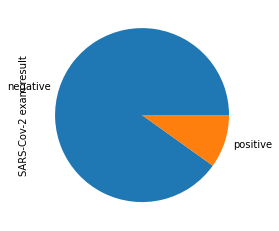

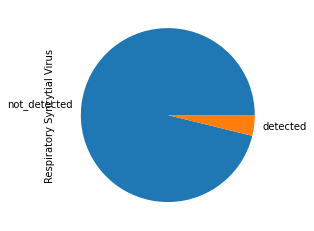

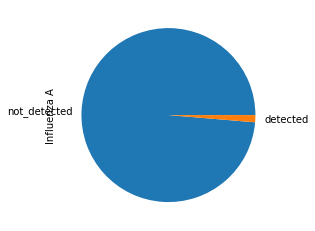

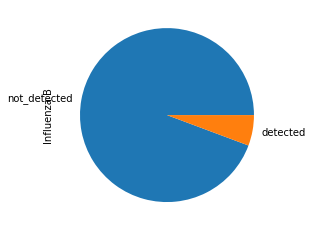

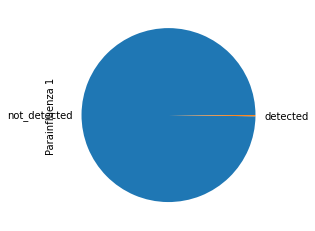

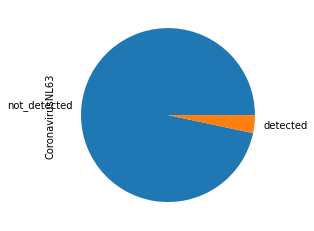

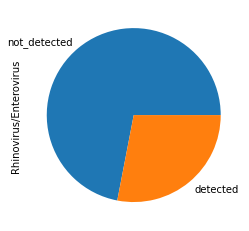

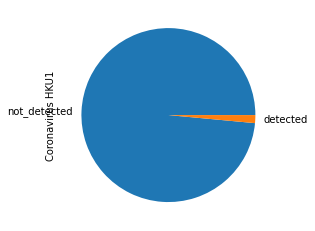

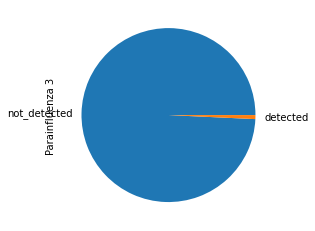

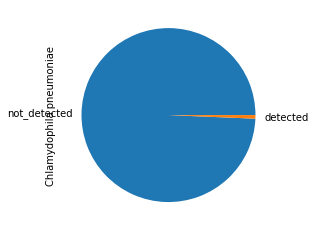

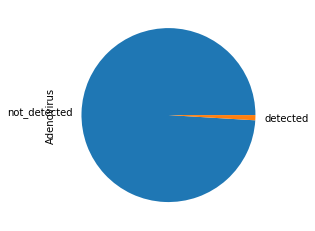

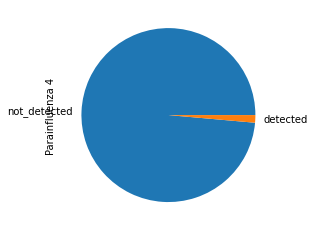

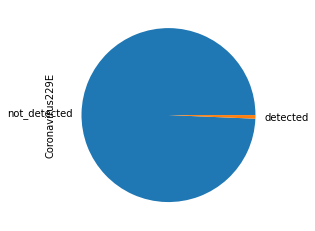

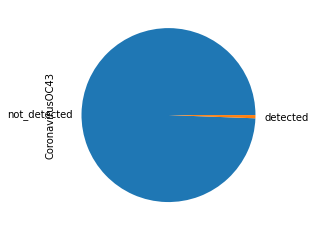

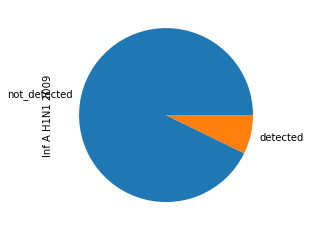

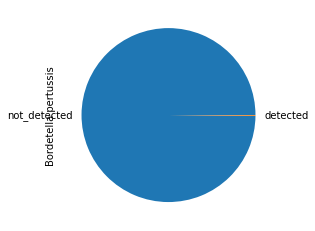

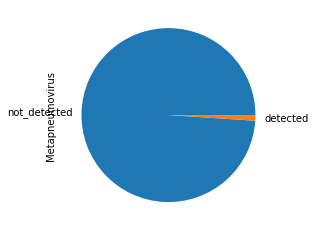

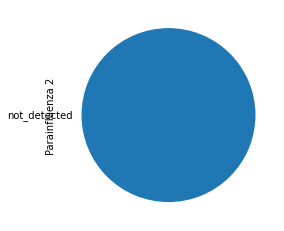

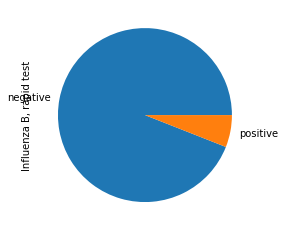

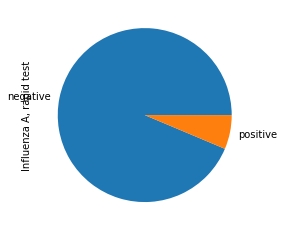

In [17]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation variables/target

### Création de 2 sous-ensemble, positifs et negatifs

In [19]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [20]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Création de 2 sous-ensemble, blood et viral

In [94]:
missing_rate = df.isna().sum()/df.shape[0]

In [95]:
blood_col = df.columns[(missing_rate>0.88) & (missing_rate<0.9)]

In [96]:
viral_col = df.columns[(missing_rate>0.75) & (missing_rate<0.80)]

### Target / blood

C:\Users\user\AppData\Local\Temp\ipykernel_8160\1743077430.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

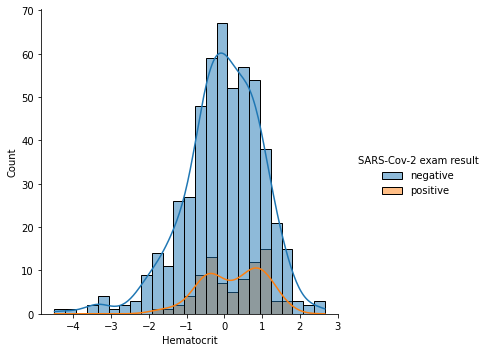

<Figure size 432x288 with 0 Axes>

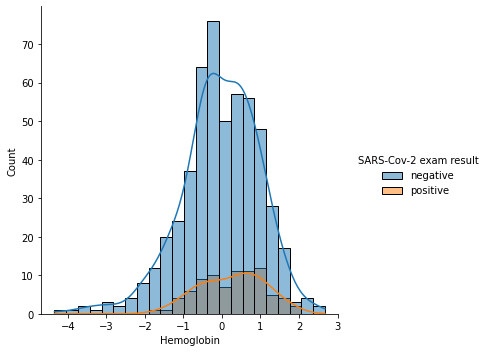

<Figure size 432x288 with 0 Axes>

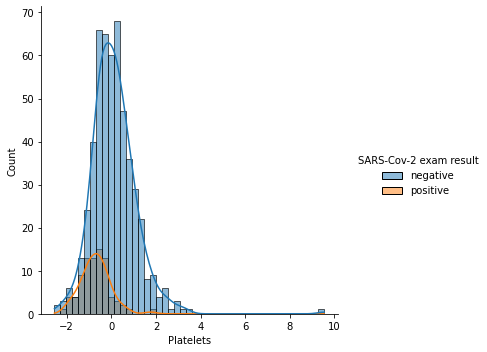

<Figure size 432x288 with 0 Axes>

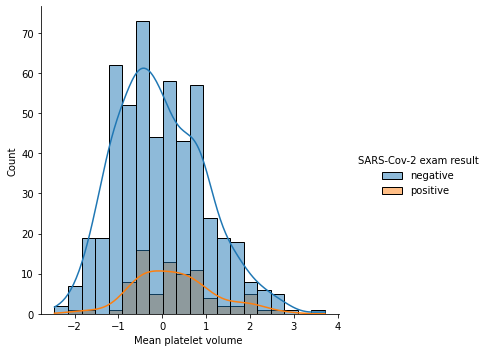

<Figure size 432x288 with 0 Axes>

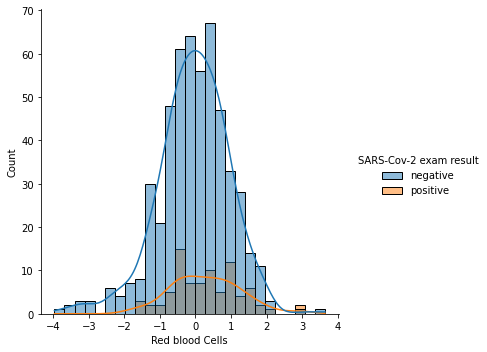

<Figure size 432x288 with 0 Axes>

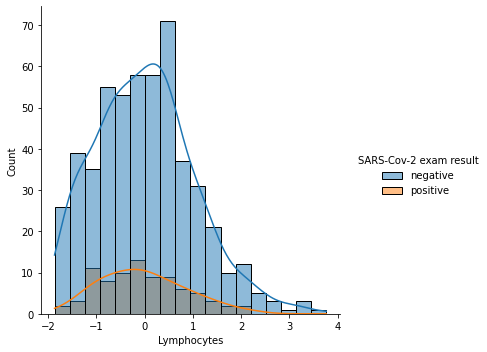

<Figure size 432x288 with 0 Axes>

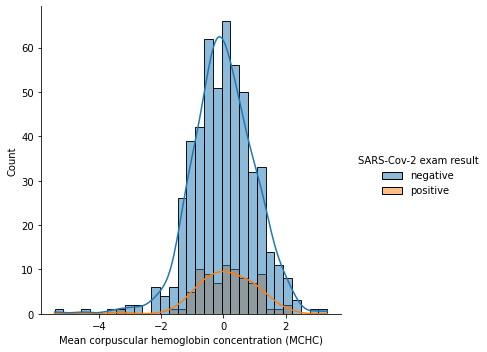

<Figure size 432x288 with 0 Axes>

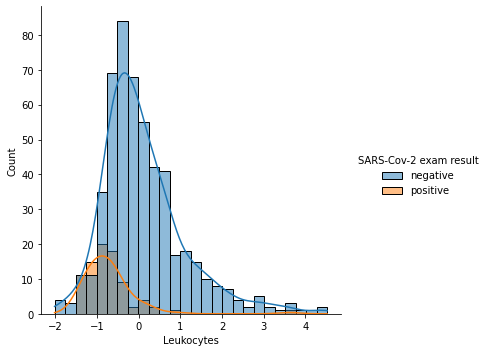

<Figure size 432x288 with 0 Axes>

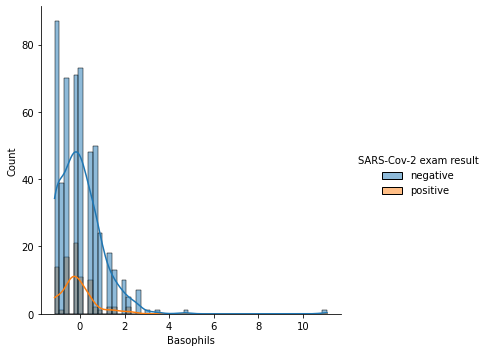

<Figure size 432x288 with 0 Axes>

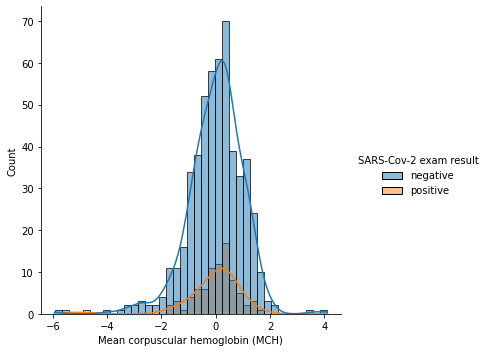

<Figure size 432x288 with 0 Axes>

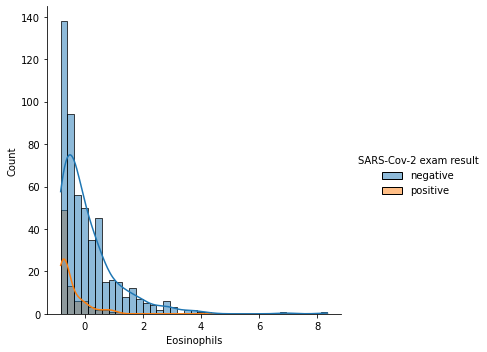

<Figure size 432x288 with 0 Axes>

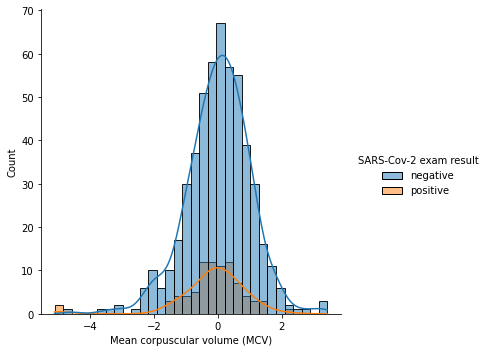

<Figure size 432x288 with 0 Axes>

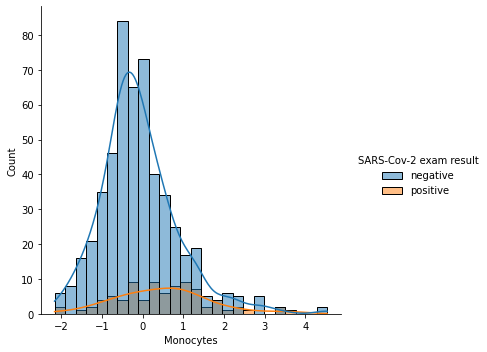

<Figure size 432x288 with 0 Axes>

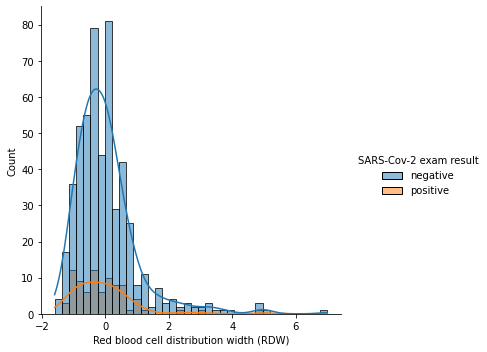

In [97]:

for col in blood_col:
    plt.figure()
    sns.displot(data=df, x=col, hue='SARS-Cov-2 exam result', kde=True)

### Target / age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

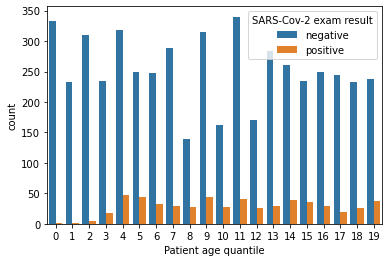

In [25]:
sns.countplot(data=df, x='Patient age quantile', hue='SARS-Cov-2 exam result')

### Target / viral

In [26]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


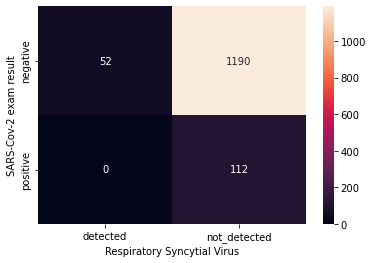

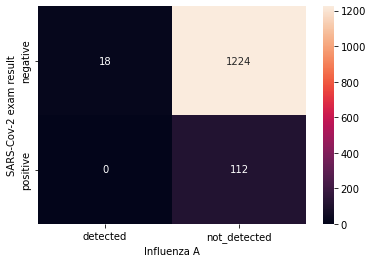

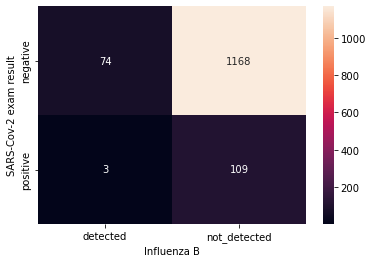

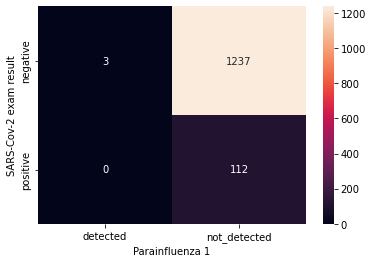

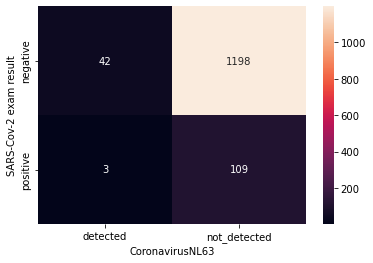

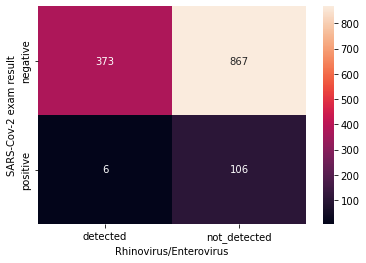

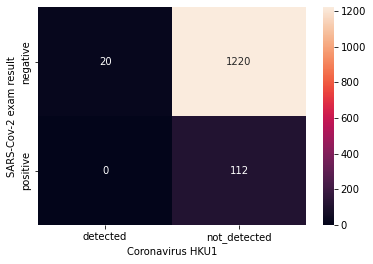

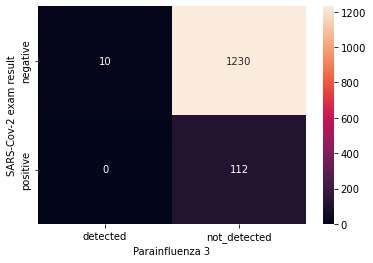

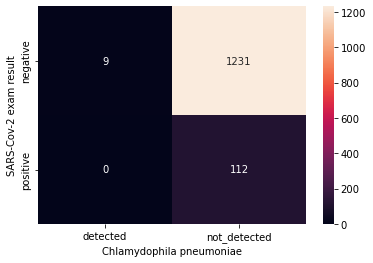

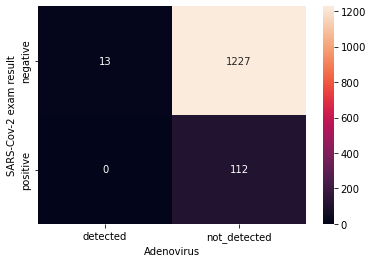

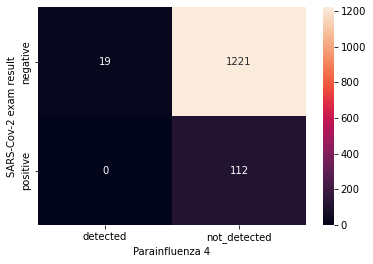

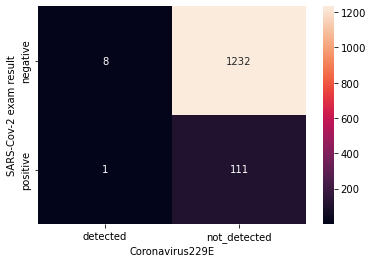

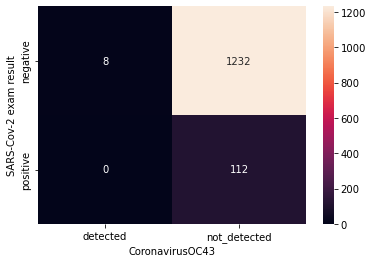

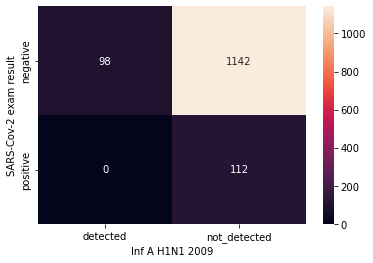

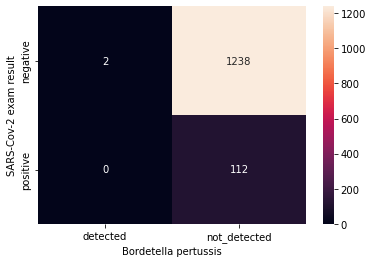

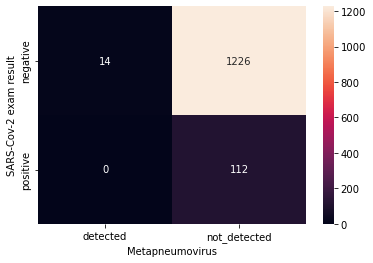

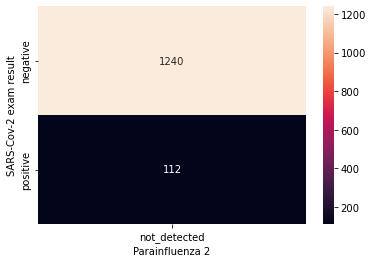

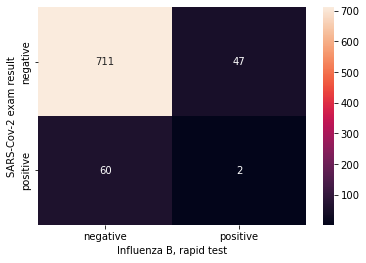

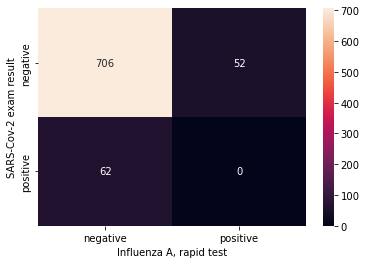

In [27]:
for col in viral_col:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

### Relation blood / blood

<AxesSubplot:>

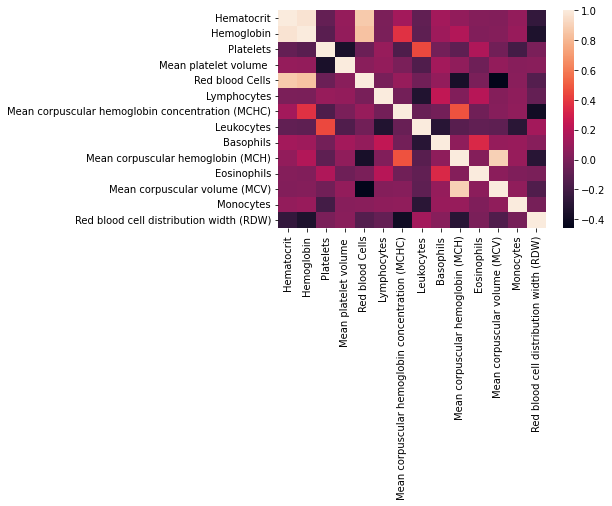

In [28]:
sns.heatmap(df[blood_col].corr())

### Relation blood / age

In [29]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Relation viral / viral (seulement les variables influenza et rapid test influenza)

In [30]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

"Influenza A, rapid test",negative,positive
Influenza A,,
detected,2,4
not_detected,245,15


In [31]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

"Influenza B, rapid test",negative,positive
Influenza B,,
detected,18,11
not_detected,233,4


### Relation maladie(hors covid) / blood

### Création d'une variable 'est malade'

In [32]:
# en ignorant les Influenza rapid test
df['est_malade'] = np.sum(df[viral_col[:-2]] == 'detected', axis=1) >= 1

In [33]:
malade_df = df[df['est_malade'] == True]
non_malade_df = df[df['est_malade'] == False]

C:\Users\user\AppData\Local\Temp\ipykernel_8160\3563985706.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

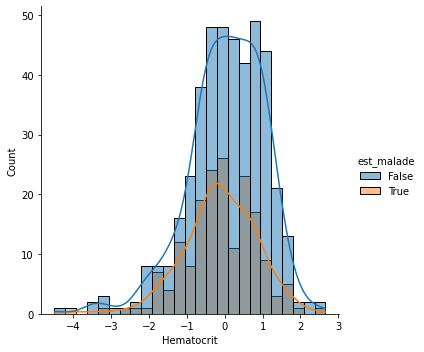

<Figure size 432x288 with 0 Axes>

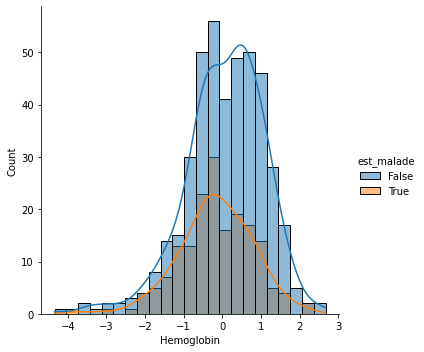

<Figure size 432x288 with 0 Axes>

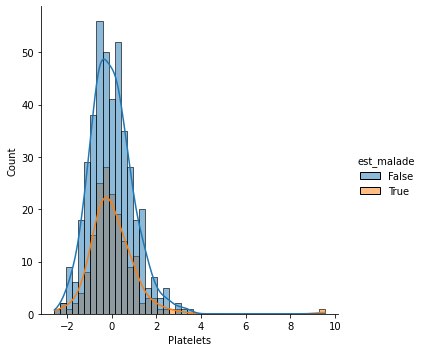

<Figure size 432x288 with 0 Axes>

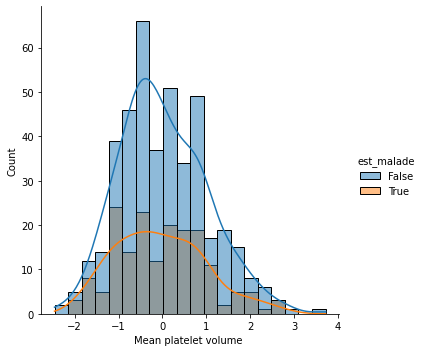

<Figure size 432x288 with 0 Axes>

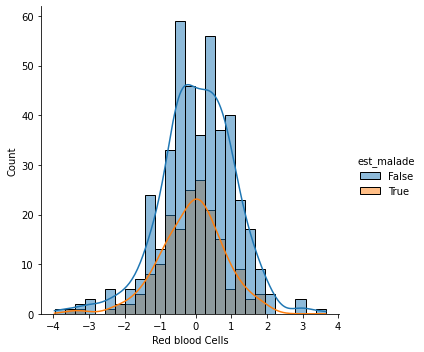

<Figure size 432x288 with 0 Axes>

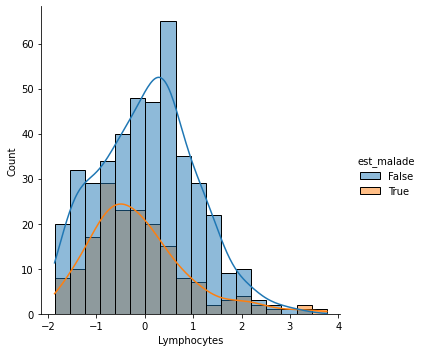

<Figure size 432x288 with 0 Axes>

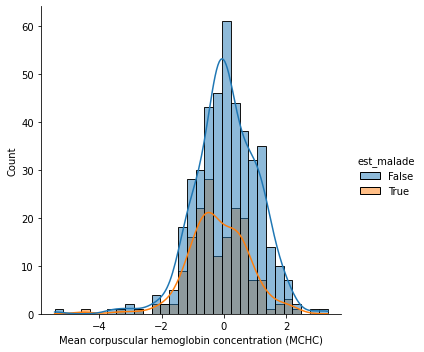

<Figure size 432x288 with 0 Axes>

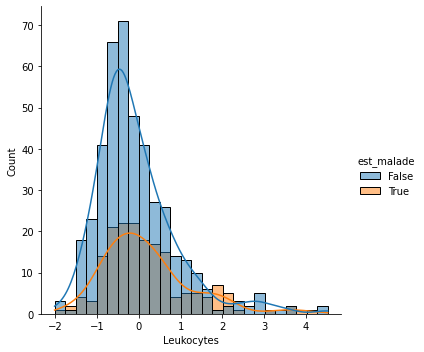

<Figure size 432x288 with 0 Axes>

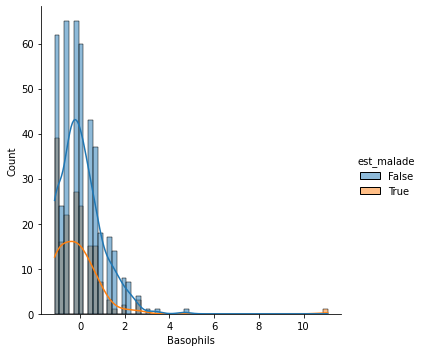

<Figure size 432x288 with 0 Axes>

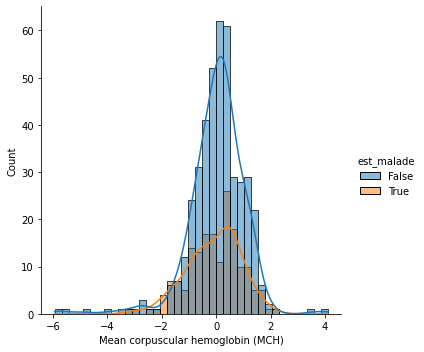

<Figure size 432x288 with 0 Axes>

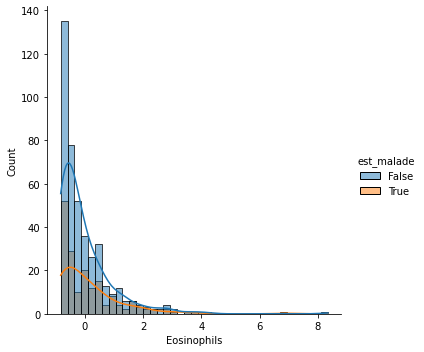

<Figure size 432x288 with 0 Axes>

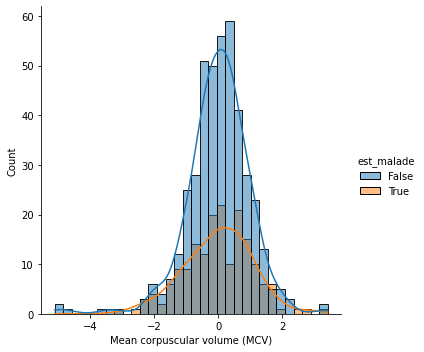

<Figure size 432x288 with 0 Axes>

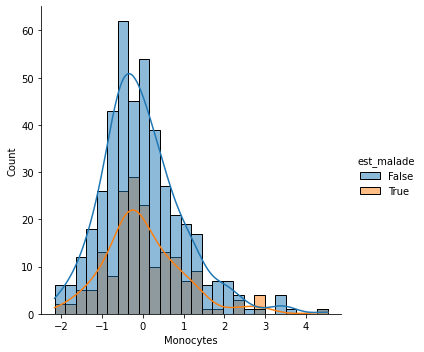

<Figure size 432x288 with 0 Axes>

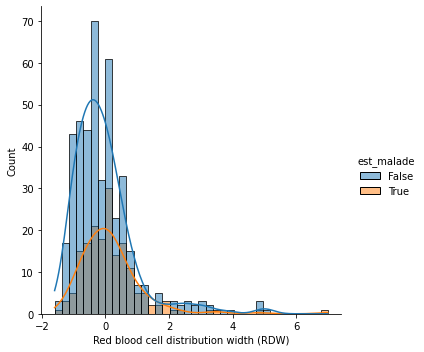

In [34]:
for col in blood_col:
    plt.figure()
    sns.displot(data=df, x=col, hue='est_malade', kde=True)

### Relation hospitalisation / blood
type d'hospitalisation = Patient addmited to regular ward (1=yes, 0=no), Patient addmited to semi-intensive unit (1=yes, 0=no), Patient addmited to intensive care unit (1=yes, 0=no)


In [35]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins demi-intensifs'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [36]:
df['statut'] = df.apply(hospitalisation, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_8160\2145965993.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

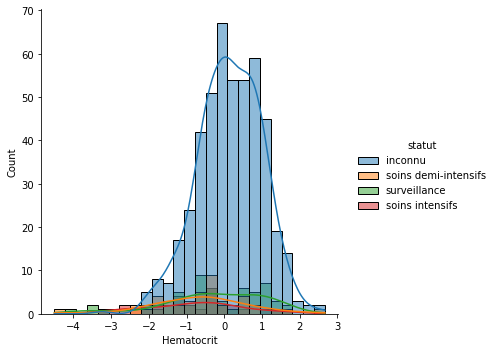

<Figure size 432x288 with 0 Axes>

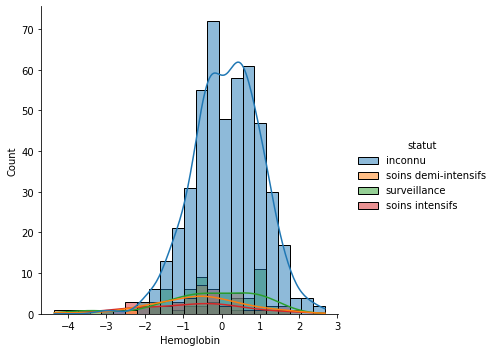

<Figure size 432x288 with 0 Axes>

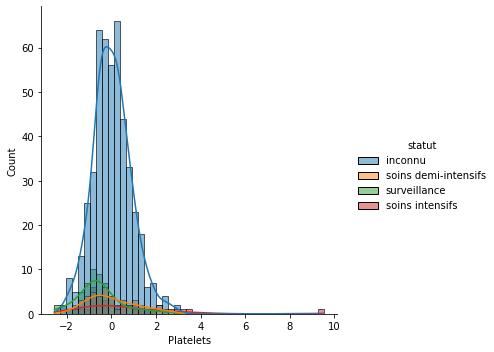

<Figure size 432x288 with 0 Axes>

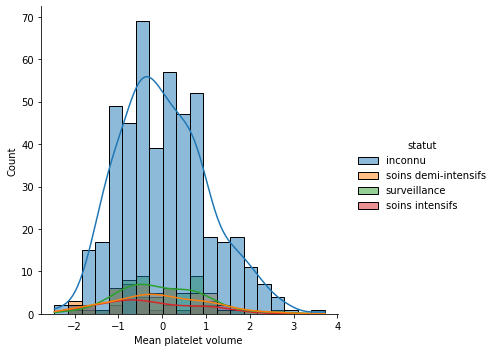

<Figure size 432x288 with 0 Axes>

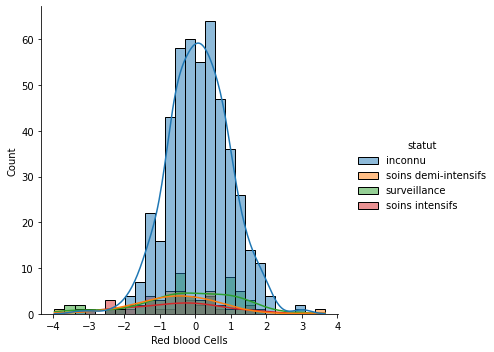

<Figure size 432x288 with 0 Axes>

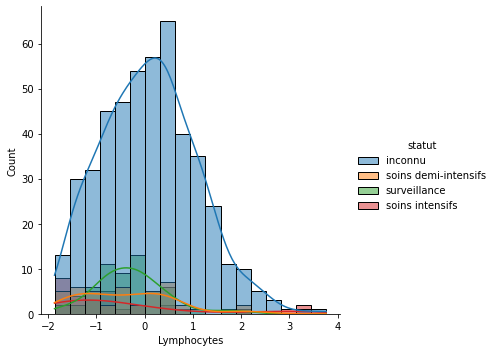

<Figure size 432x288 with 0 Axes>

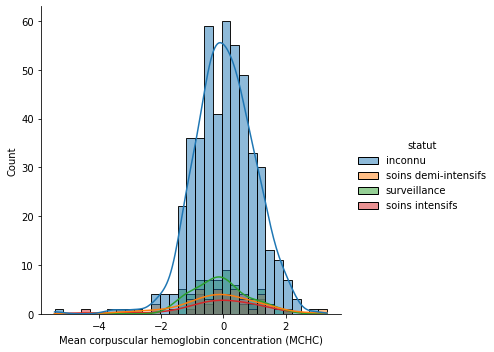

<Figure size 432x288 with 0 Axes>

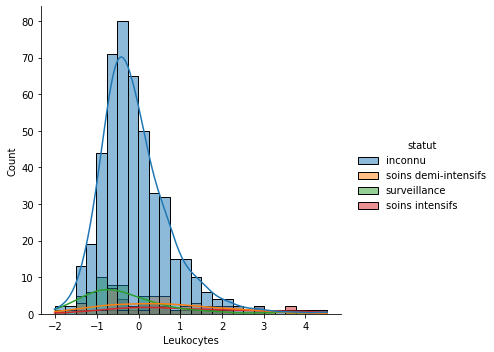

<Figure size 432x288 with 0 Axes>

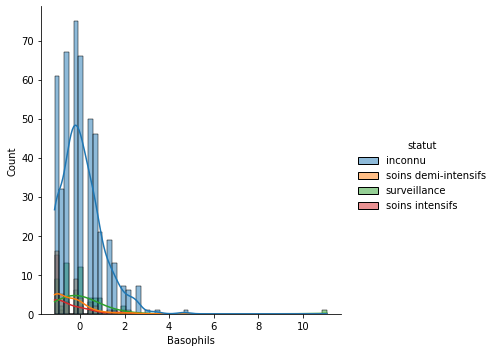

<Figure size 432x288 with 0 Axes>

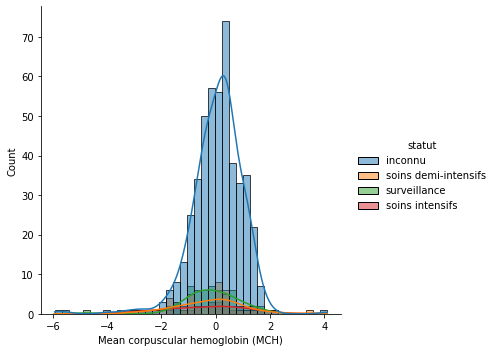

<Figure size 432x288 with 0 Axes>

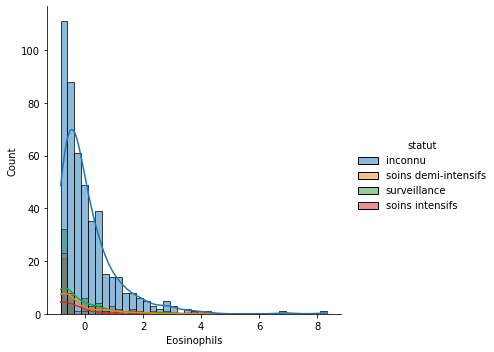

<Figure size 432x288 with 0 Axes>

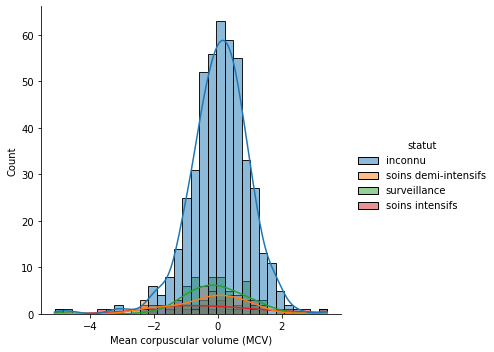

<Figure size 432x288 with 0 Axes>

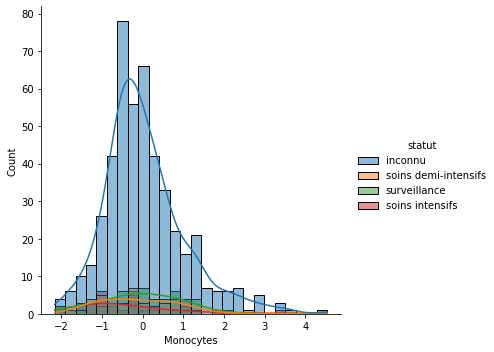

<Figure size 432x288 with 0 Axes>

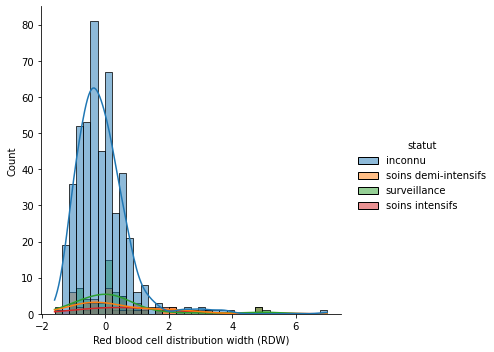

In [37]:
for col in blood_col:
    plt.figure()
    sns.displot(data=df, x=col, hue='statut', kde=True)
    

## Nan Analyse

In [49]:
df1 = df[blood_col]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8160\111303182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [39]:
df2 = df[viral_col]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\user\AppData\Local\Temp\ipykernel_8160\3591290676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


negative    0.928302
positive    0.071698
Name: covid, dtype: float64

## Student Test (Test d'hypothèses)

In [40]:
from scipy.stats import ttest_ind

In [41]:
balanced_ned = negative_df.sample(positive_df.shape[0])

In [42]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_ned[col].dropna(), positive_df[col].dropna())
    return 'H0 Rejetée' if p<alpha else 0

In [98]:
for col in blood_col:
    print(f'{col :-<60} {t_test(col)}')

Hematocrit-------------------------------------------------- 0
Hemoglobin-------------------------------------------------- 0
Platelets--------------------------------------------------- H0 Rejetée
Mean platelet volume --------------------------------------- 0
Red blood Cells--------------------------------------------- 0
Lymphocytes------------------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)------------ 0
Leukocytes-------------------------------------------------- H0 Rejetée
Basophils--------------------------------------------------- 0
Mean corpuscular hemoglobin (MCH)--------------------------- 0
Eosinophils------------------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)------------------------------- 0
Monocytes--------------------------------------------------- 0
Red blood cell distribution width (RDW)--------------------- 0


# Data Preprocessing

In [218]:
df1 = data.copy()

## Création des sous-ensembles (suite à l'exploration)

In [100]:
missing_rate = df1.isna().sum()/df.shape[0]

In [101]:
blood_col = list(df1.columns[(missing_rate>0.88) & (missing_rate<0.9)])
viral_col = list(df1.columns[(missing_rate>0.75) & (missing_rate<0.80)])

In [168]:
key_col = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [219]:
# on enlève les variables virales car une évaluation montre qu'elles ont moins d'importance
# mais le score reste toujours bas avec DecisionTreeClassifier
df1 = df1[key_col + blood_col + viral_col]

## TrainTest - Encodage - Nettoyage

In [58]:
from sklearn.model_selection import train_test_split

In [222]:
trainset, testset = train_test_split(df1, test_size=0.2, random_state=0)

# on s'assure d'avoir les memes proportions de cas covid
print(trainset['SARS-Cov-2 exam result'].value_counts())
print(testset['SARS-Cov-2 exam result'].value_counts())

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64
negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64


### Fonctions de Preprocessing

In [230]:
def encodage(df0):
    code = {'positive': 1,
            'negative': 0,
            'detected': 1,
            'not_detected': 0}
    
    for col in df0.select_dtypes('object'):
        df0[col] = df0[col].map(code)
    
    return df0

In [231]:
# score toujours pas très bon avec le RandomForestClassifier -> envisager Pipeline + SelectKBest
def feature_engineering(df0):
    df0['est malade'] = df0[viral_col].sum(axis=1) >= 1
    df0 = df0.drop(viral_col, axis=1)
    return df0

In [232]:
def imputation(df0):
    #1 return df0.dropna(axis=0) -> overfitting
    #2 return df0.fillna(-999) -> score très bas
    #3 df0['is na'] = (df0['Parainfluenza 3'].isna()) | (df0['Leukocytes'].isna()) -> score très bas
    #  return df0.fillna(-999) -> Missing Indicator
    return df0.dropna(axis=0)

In [233]:
def preprocessing(df0):

    df0 = encodage(df0)
    df0 = feature_engineering(df0)
    df0 = imputation(df0)
    
    X = df0.drop('SARS-Cov-2 exam result', axis=1)
    y = df0['SARS-Cov-2 exam result']
    print(y.value_counts())
    
    return X, y

In [234]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [235]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


## Modelisation

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [237]:
model_1 = DecisionTreeClassifier(random_state=0)

In [264]:
# en changeant k=10 en k=5 on augmente le recall -> envisage ajouter PolynomialFeatures 
# on repart avec k=10 pour filtrer les variables créées avec PolynomialFeatures
model_2 = make_pipeline(PolynomialFeatures(2),
                      SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

In [278]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                             SelectKBest(f_classif, k=10))

In [279]:
# arbre de décision -> pas besoin de normaliser les données
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))

# il faut normaliser les données car sensible aux normes des données
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [280]:
dict_of_models = {'RandomForest': RandomForest, 
                  'AdaBoost': AdaBoost, 
                  'SVM': SVM, 
                  'KNN': KNN}

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

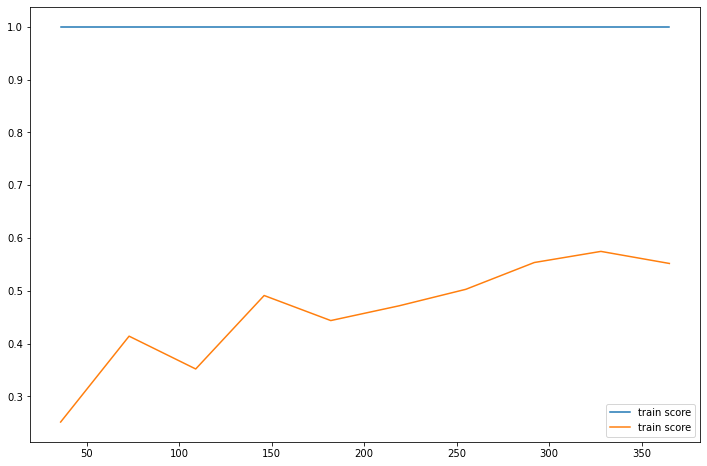

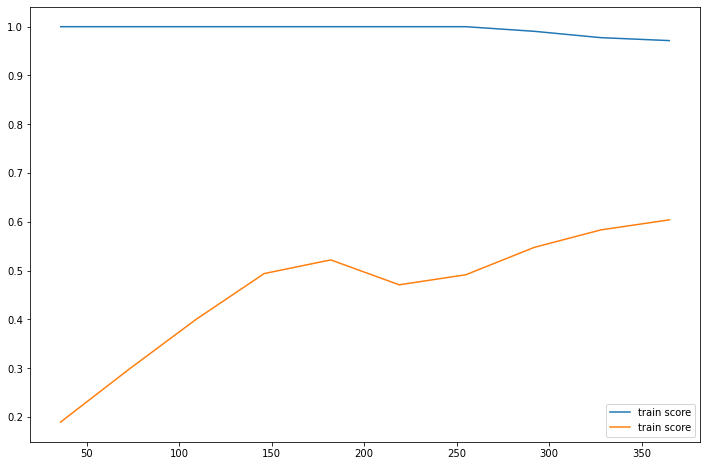

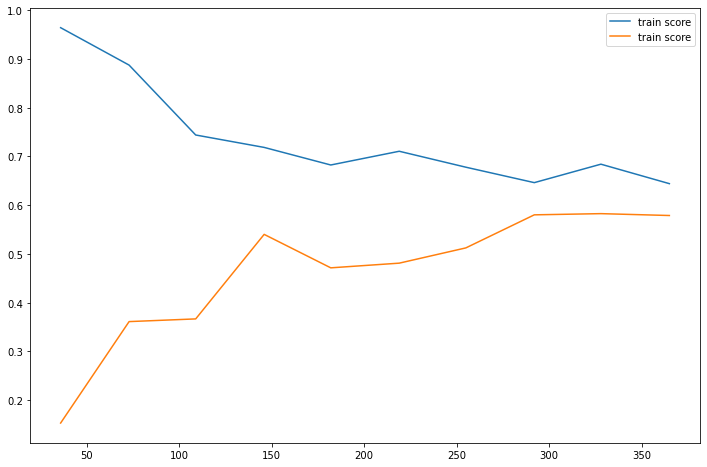

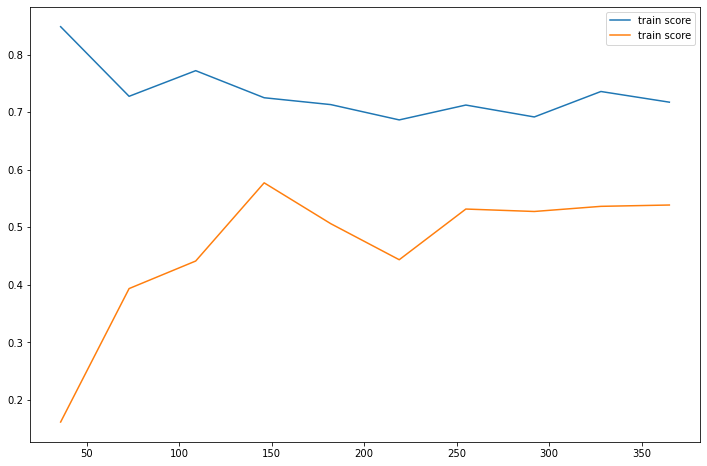

In [274]:
# on prend le modèle avec meilleur f1_score
# sur la courbe d'apprentissage -> réduire l'écart train_score-validation_score
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Procédure d'évaluation

In [345]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [239]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4,
                                              scoring='f1',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='train score')
    plt.legend()

In [269]:
#evaluation(model_1)
#evaluation(model_2)

<AxesSubplot:>

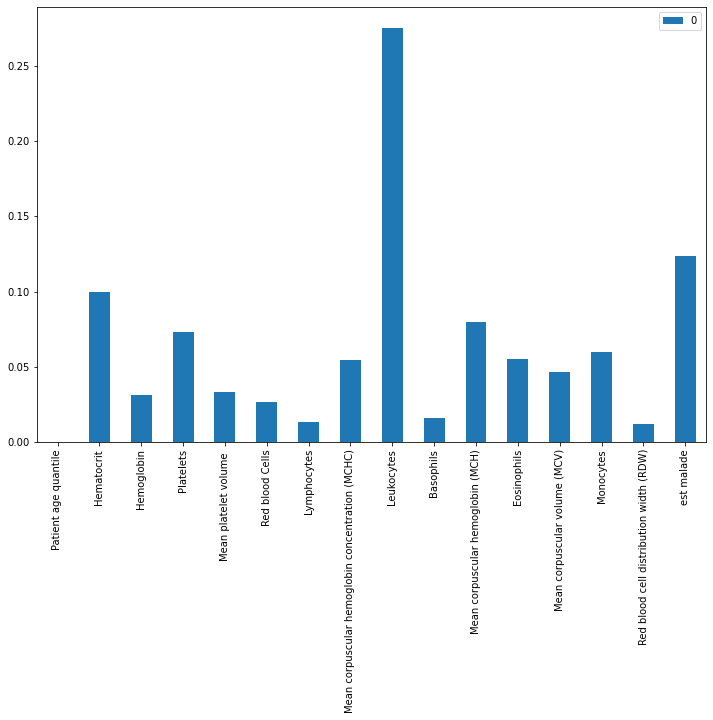

In [243]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

## Optimisation

In [326]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [323]:
print(SVM.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__polynomialfeatures', 'pipeline__selectkbest', 'pipeline__polynomialfeatures__degree', 'pipeline__polynomialfeatures__include_bias', 'pipeline__polynomialfeatures__interaction_only', 'pipeline__polynomialfeatures__order', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])


In [324]:
params = {'svc__gamma': [1e-3,1e-5],
          'svc__C': [1, 10, 100, 1000]}

{'svc__C': 1000, 'svc__gamma': 0.001}
[[92  3]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.70      0.44      0.54        16

    accuracy                           0.89       111
   macro avg       0.81      0.70      0.74       111
weighted avg       0.88      0.89      0.88       111



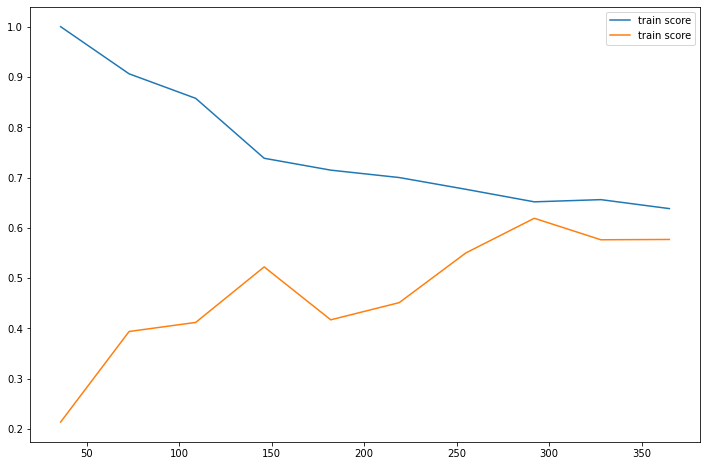

In [332]:
grid = GridSearchCV(SVM, 
                    params, 
                    scoring='recall', 
                    cv=4)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(grid.best_params_)

# les 2 courbes tendent à se rapporcher -> pas d'overfitting, apprend à généraliser
evaluation(grid.best_estimator_)

In [325]:
params2 = {'svc__gamma': [1e-3,1e-5],
          'svc__C': [1, 10, 100, 1000],
          'pipeline__polynomialfeatures__degree': [2, 3, 4],
          'pipeline__selectkbest__k': range(4,100)}

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 56, 'pipeline__polynomialfeatures__degree': 3}
[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



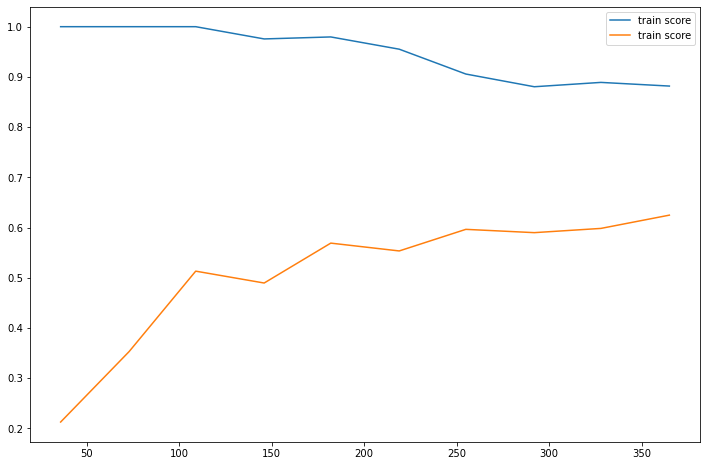

In [331]:
# RandomizedSearchCV si beaucoup d'hyperparamètres
grid2 = RandomizedSearchCV(SVM, 
                    params2, 
                    scoring='recall', 
                    cv=4,
                    n_iter=40)

grid2.fit(X_train, y_train)

y_pred = grid2.predict(X_test)

print(grid2.best_params_)

# les 2 courbes tendent à se rapporcher -> pas d'overfitting, apprend à généraliser
evaluation(grid2.best_estimator_)

## Precision Recall Curve (courbe precision/recall)

In [333]:
from sklearn.metrics import precision_recall_curve

In [336]:
precision, recall, threshold = precision_recall_curve(y_test, 
                                                      grid.best_estimator_.decision_function(X_test))

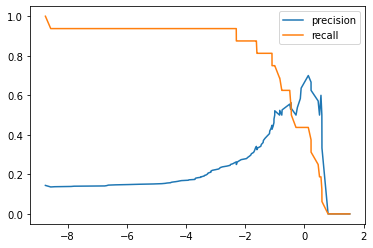

In [339]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [340]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [341]:
y_pred = model_final(grid.best_estimator_, X_test, -1)

In [347]:
print(f'f1 score: {f1_score(y_test, y_pred)}')
print(f'recall score: {recall_score(y_test, y_pred)}')

f1 score: 0.5789473684210527
recall score: 0.6875
